# Задание

Применим полученные навыки для анализа данных о ценах на недвижимость в Бостоне, опубликованных в статье 1978 г. Содержит информацию о жилье в Бостоне, собранную бюро переписи населения США.

Подробнее о наборе данных: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

Ваша задача:
1. Построить модель линейной регрессии
2. Получить коэффиценты уравнения линейной регрессии
3. Написать уравнение линейной регрессии
4. Визуализировать данные и полученное уравнение линейной регрессии
5. Посчитать в ручную MSE (расчеты привести в ноутбуке)
6. Посчитать MSE, MAE, R2 с использованием встроенных методов библиотеки sklearn и сделать вывод по полученным метрикам.

In [50]:
# Данный набор встроен в библиотеку Sickit-learn как обучающий
# Его можно загрузить из библиотеки Sklearn и посмотреть описание датасета

from sklearn.datasets import load_boston

boston = load_boston()

print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

D:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :fu

In [81]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [11]:
columns = ['target'] + list(boston.feature_names)

df = pd.DataFrame(data=np.c_[boston.target, boston.data],
                  columns=columns)

df

,target,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,20.6,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,23.9,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,22.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [68]:
x = np.array(df['CRIM']).reshape(-1,1)
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

print(x_train)
print(y_train)

[[2.10380e-01]
 [1.20742e+00]
 [3.58090e-01]
 [1.36781e+01]
 [5.29305e+00]
 [3.35900e-02]
 [8.49213e+00]
 [1.32620e-01]
 [6.27390e-01]
 [3.75780e-01]
 [9.32909e+00]
 [5.37200e-02]
 [1.18123e+01]
 [4.62960e-01]
 [4.20300e-02]
 [4.22239e+00]
 [3.96100e-02]
 [2.48017e+01]
 [3.03470e-01]
 [5.87205e+00]
 [3.77498e+00]
 [5.78340e-01]
 [9.37800e-02]
 [5.11830e-01]
 [9.92485e+00]
 [5.44520e-01]
 [6.80117e+00]
 [2.43938e+01]
 [2.21880e-01]
 [3.47428e+00]
 [5.47900e-02]
 [1.44760e-01]
 [2.29270e-01]
 [7.15100e-02]
 [1.43337e+01]
 [6.12900e-02]
 [1.58760e-01]
 [5.20140e-01]
 [6.61700e-02]
 [2.76300e-02]
 [4.52700e-02]
 [8.20058e+00]
 [2.53870e-01]
 [5.57780e-01]
 [2.36482e+01]
 [1.06718e+01]
 [4.26131e+00]
 [3.04900e-02]
 [1.19294e+00]
 [1.35222e+01]
 [1.91330e-01]
 [1.25790e-01]
 [6.37960e-01]
 [1.70900e-02]
 [4.98100e-02]
 [9.29900e-02]
 [7.36711e+00]
 [1.80028e+00]
 [8.70700e-02]
 [3.67822e+00]
 [1.75050e-01]
 [3.11300e-02]
 [9.88430e-01]
 [9.26600e-02]
 [7.90410e-01]
 [4.87141e+00]
 [1.14320e

In [69]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [75]:
w0 = model.intercept_
print('Свободный коэффицент уравнения w0:')
print(w0)

Свободный коэффицент уравнения w0:
24.454383427870265


In [76]:
w1 = model.coef_
print('Веса всех признаков (w1): ')
print(w1)

Веса всех признаков (w1): 
[-0.49065609]


In [80]:
print('Уравнение линейной регресии в общем виде: y = w1 * x + w0')
print(f'Уравнение линейной регрессии в текущей задаче: y = {w1[0]} * x + {w0}')

Уравнение линейной регресии в общем виде: y = w1 * x + w0
Уравнение линейной регрессии в текущей задаче: y = -0.4906560931997529 * x + 24.454383427870265


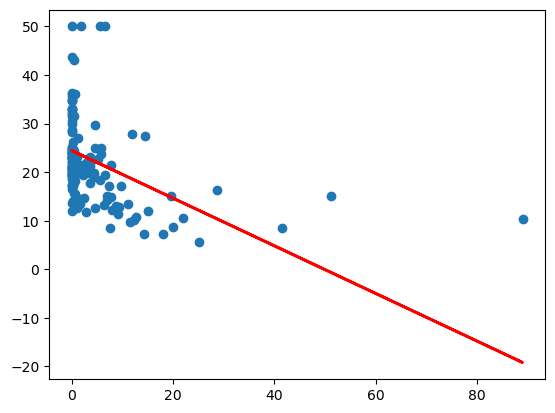

In [83]:
y_pred = model.predict(x_test)

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='red', linewidth=2);
plt.show()

In [94]:
MSE = sum(y_pred - y_test)**2 / len(y_pred)
MSE

37.18576381579884

In [87]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Mean Absolute Error: 5.93823404668816
Mean Squared Error: 66.29635233238402
R2 score: 0.07496689466348638
